# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [11]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### Day 0

In [101]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda = pd.read_csv('data/exp_1/EDA.csv' , header= None)
fl_eda.columns  = ['eda']
fl_eda_freq = fl_eda.iloc[1].values
print(len(fl_eda))
print('freq: ', fl_eda_freq)
fl_eda.head(10)

1232
freq:  [4.]


,eda
0,1.526949e+09
1,4.000000e+00
2,0.000000e+00
3,3.446160e-01
4,4.150760e-01
5,4.278870e-01
6,4.330120e-01
7,4.227630e-01
8,3.804870e-01
9,3.881730e-01


In [102]:
fl_init_time = datetime.datetime.utcfromtimestamp(fl_eda.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time

'2018-05-22 00:29:47'

In [103]:
fl_eda = fl_eda.iloc[2:]
fl_eda.head(5)

,eda
2,0.000000
3,0.344616
4,0.415076
5,0.427887
6,0.433012


In [104]:
#create index 
fl_time_eda = pd.date_range(start=fl_init_time, periods=len(fl_eda), freq=str(1/int(fl_eda_freq))+'S')
fl_time_eda

DatetimeIndex([       '2018-05-22 00:29:47', '2018-05-22 00:29:47.250000',
               '2018-05-22 00:29:47.500000', '2018-05-22 00:29:47.750000',
                      '2018-05-22 00:29:48', '2018-05-22 00:29:48.250000',
               '2018-05-22 00:29:48.500000', '2018-05-22 00:29:48.750000',
                      '2018-05-22 00:29:49', '2018-05-22 00:29:49.250000',
               ...
                      '2018-05-22 00:34:52', '2018-05-22 00:34:52.250000',
               '2018-05-22 00:34:52.500000', '2018-05-22 00:34:52.750000',
                      '2018-05-22 00:34:53', '2018-05-22 00:34:53.250000',
               '2018-05-22 00:34:53.500000', '2018-05-22 00:34:53.750000',
                      '2018-05-22 00:34:54', '2018-05-22 00:34:54.250000'],
              dtype='datetime64[ns]', length=1230, freq='250L')

In [105]:
fl_eda = fl_eda.set_index(fl_time_eda, drop =True)
fl_eda.head()

,eda
2018-05-22 00:29:47.000,0.000000
2018-05-22 00:29:47.250,0.344616
2018-05-22 00:29:47.500,0.415076
2018-05-22 00:29:47.750,0.427887
2018-05-22 00:29:48.000,0.433012


In [127]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda = fl_eda[:-10]
fl_eda = fl_eda.dropna()
print(len(fl_eda))
fl_eda.head()

1220


,eda
2018-05-22 00:29:47.000,0.000000
2018-05-22 00:29:47.250,0.344616
2018-05-22 00:29:47.500,0.415076
2018-05-22 00:29:47.750,0.427887
2018-05-22 00:29:48.000,0.433012


### Visualization

#### Remove Outliers

In [128]:
fl_exp0 = fl_eda.copy()#example dataset of normally distributed data. 
fl_exp0= fl_exp0[np.abs(fl_exp0.eda-fl_exp0.eda.mean())<=(3*fl_exp0.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp0= fl_exp0[~(np.abs(fl_exp0.eda-fl_exp0.eda.mean())>(3*fl_exp0.eda.std()))] #or if you prefer the other way around

print(len(fl_exp0))
fl_exp0.eda[:10]


1207


2018-05-22 00:29:47.250    0.344616
2018-05-22 00:29:47.500    0.415076
2018-05-22 00:29:48.500    0.380487
2018-05-22 00:29:48.750    0.388173
2018-05-22 00:29:49.000    0.416357
2018-05-22 00:29:49.250    0.374081
2018-05-22 00:29:49.500    0.353584
2018-05-22 00:29:49.750    0.381768
2018-05-22 00:29:50.000    0.417639
2018-05-22 00:29:50.750    0.418920
Name: eda, dtype: float64

### Histogram

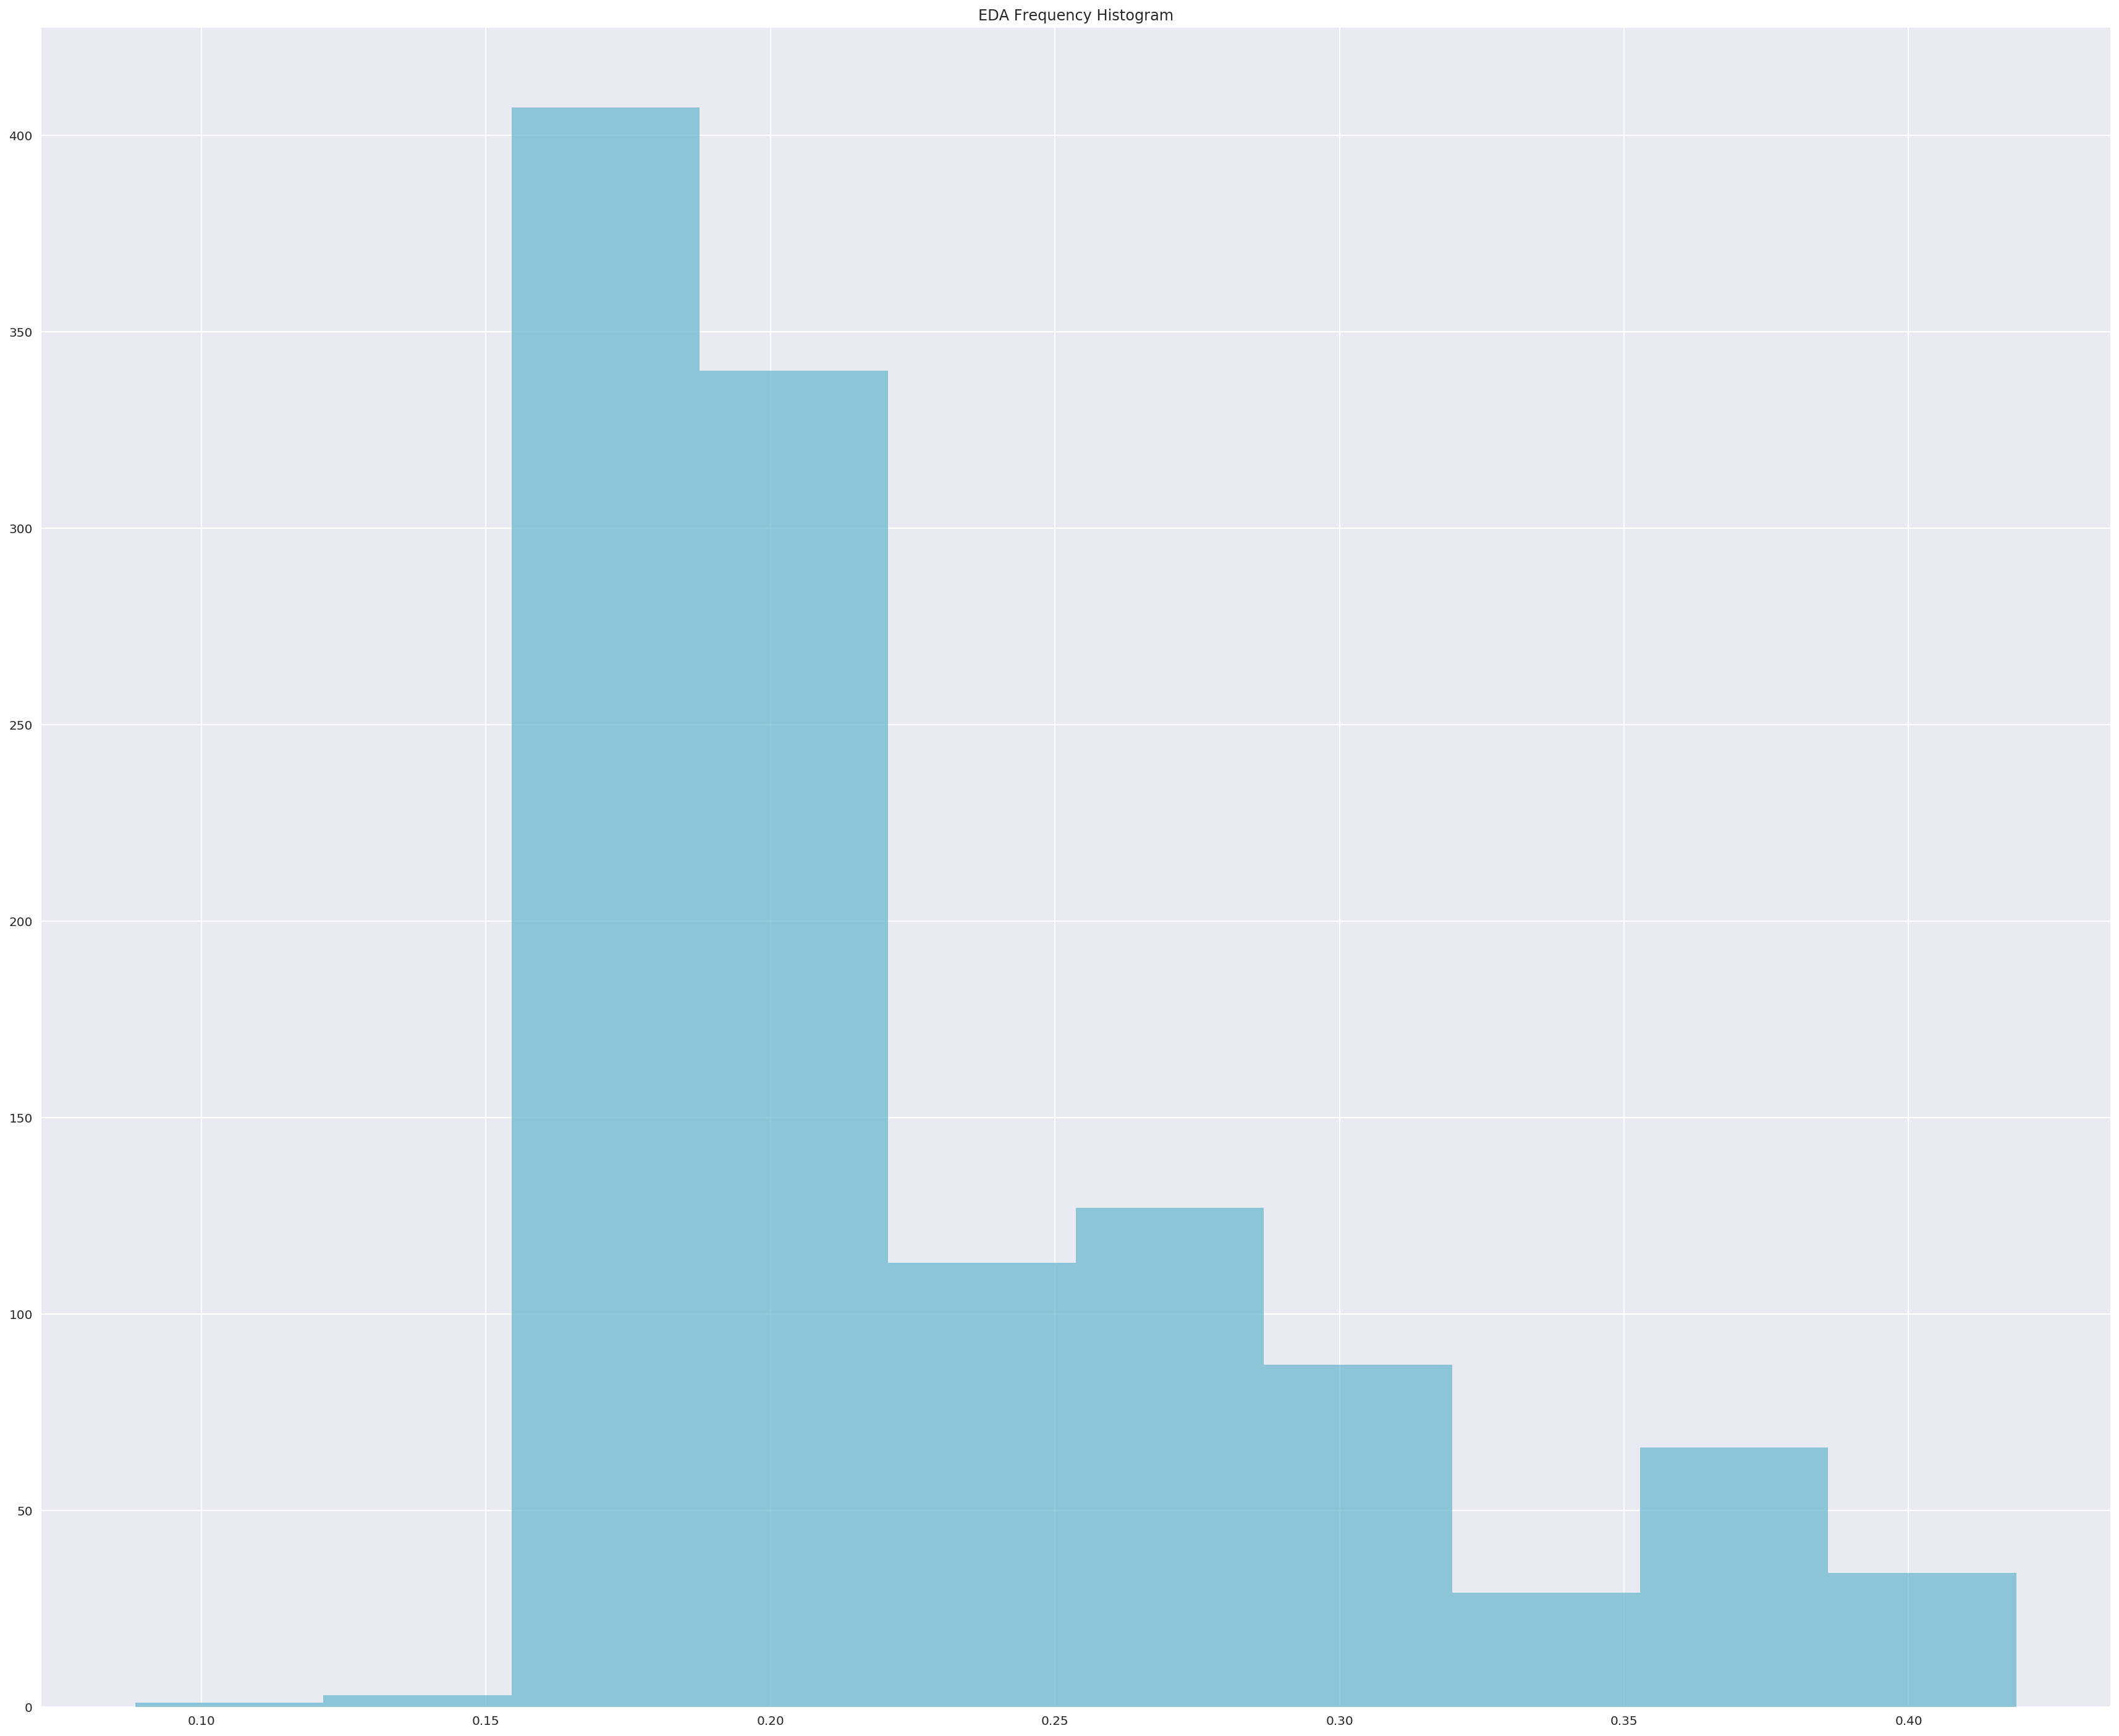

In [129]:
plt.hist(fl_exp0.eda, color = 'c', alpha = 0.7)
plt.title('EDA Frequency Histogram')
plt.show()

#### Time-series Plot

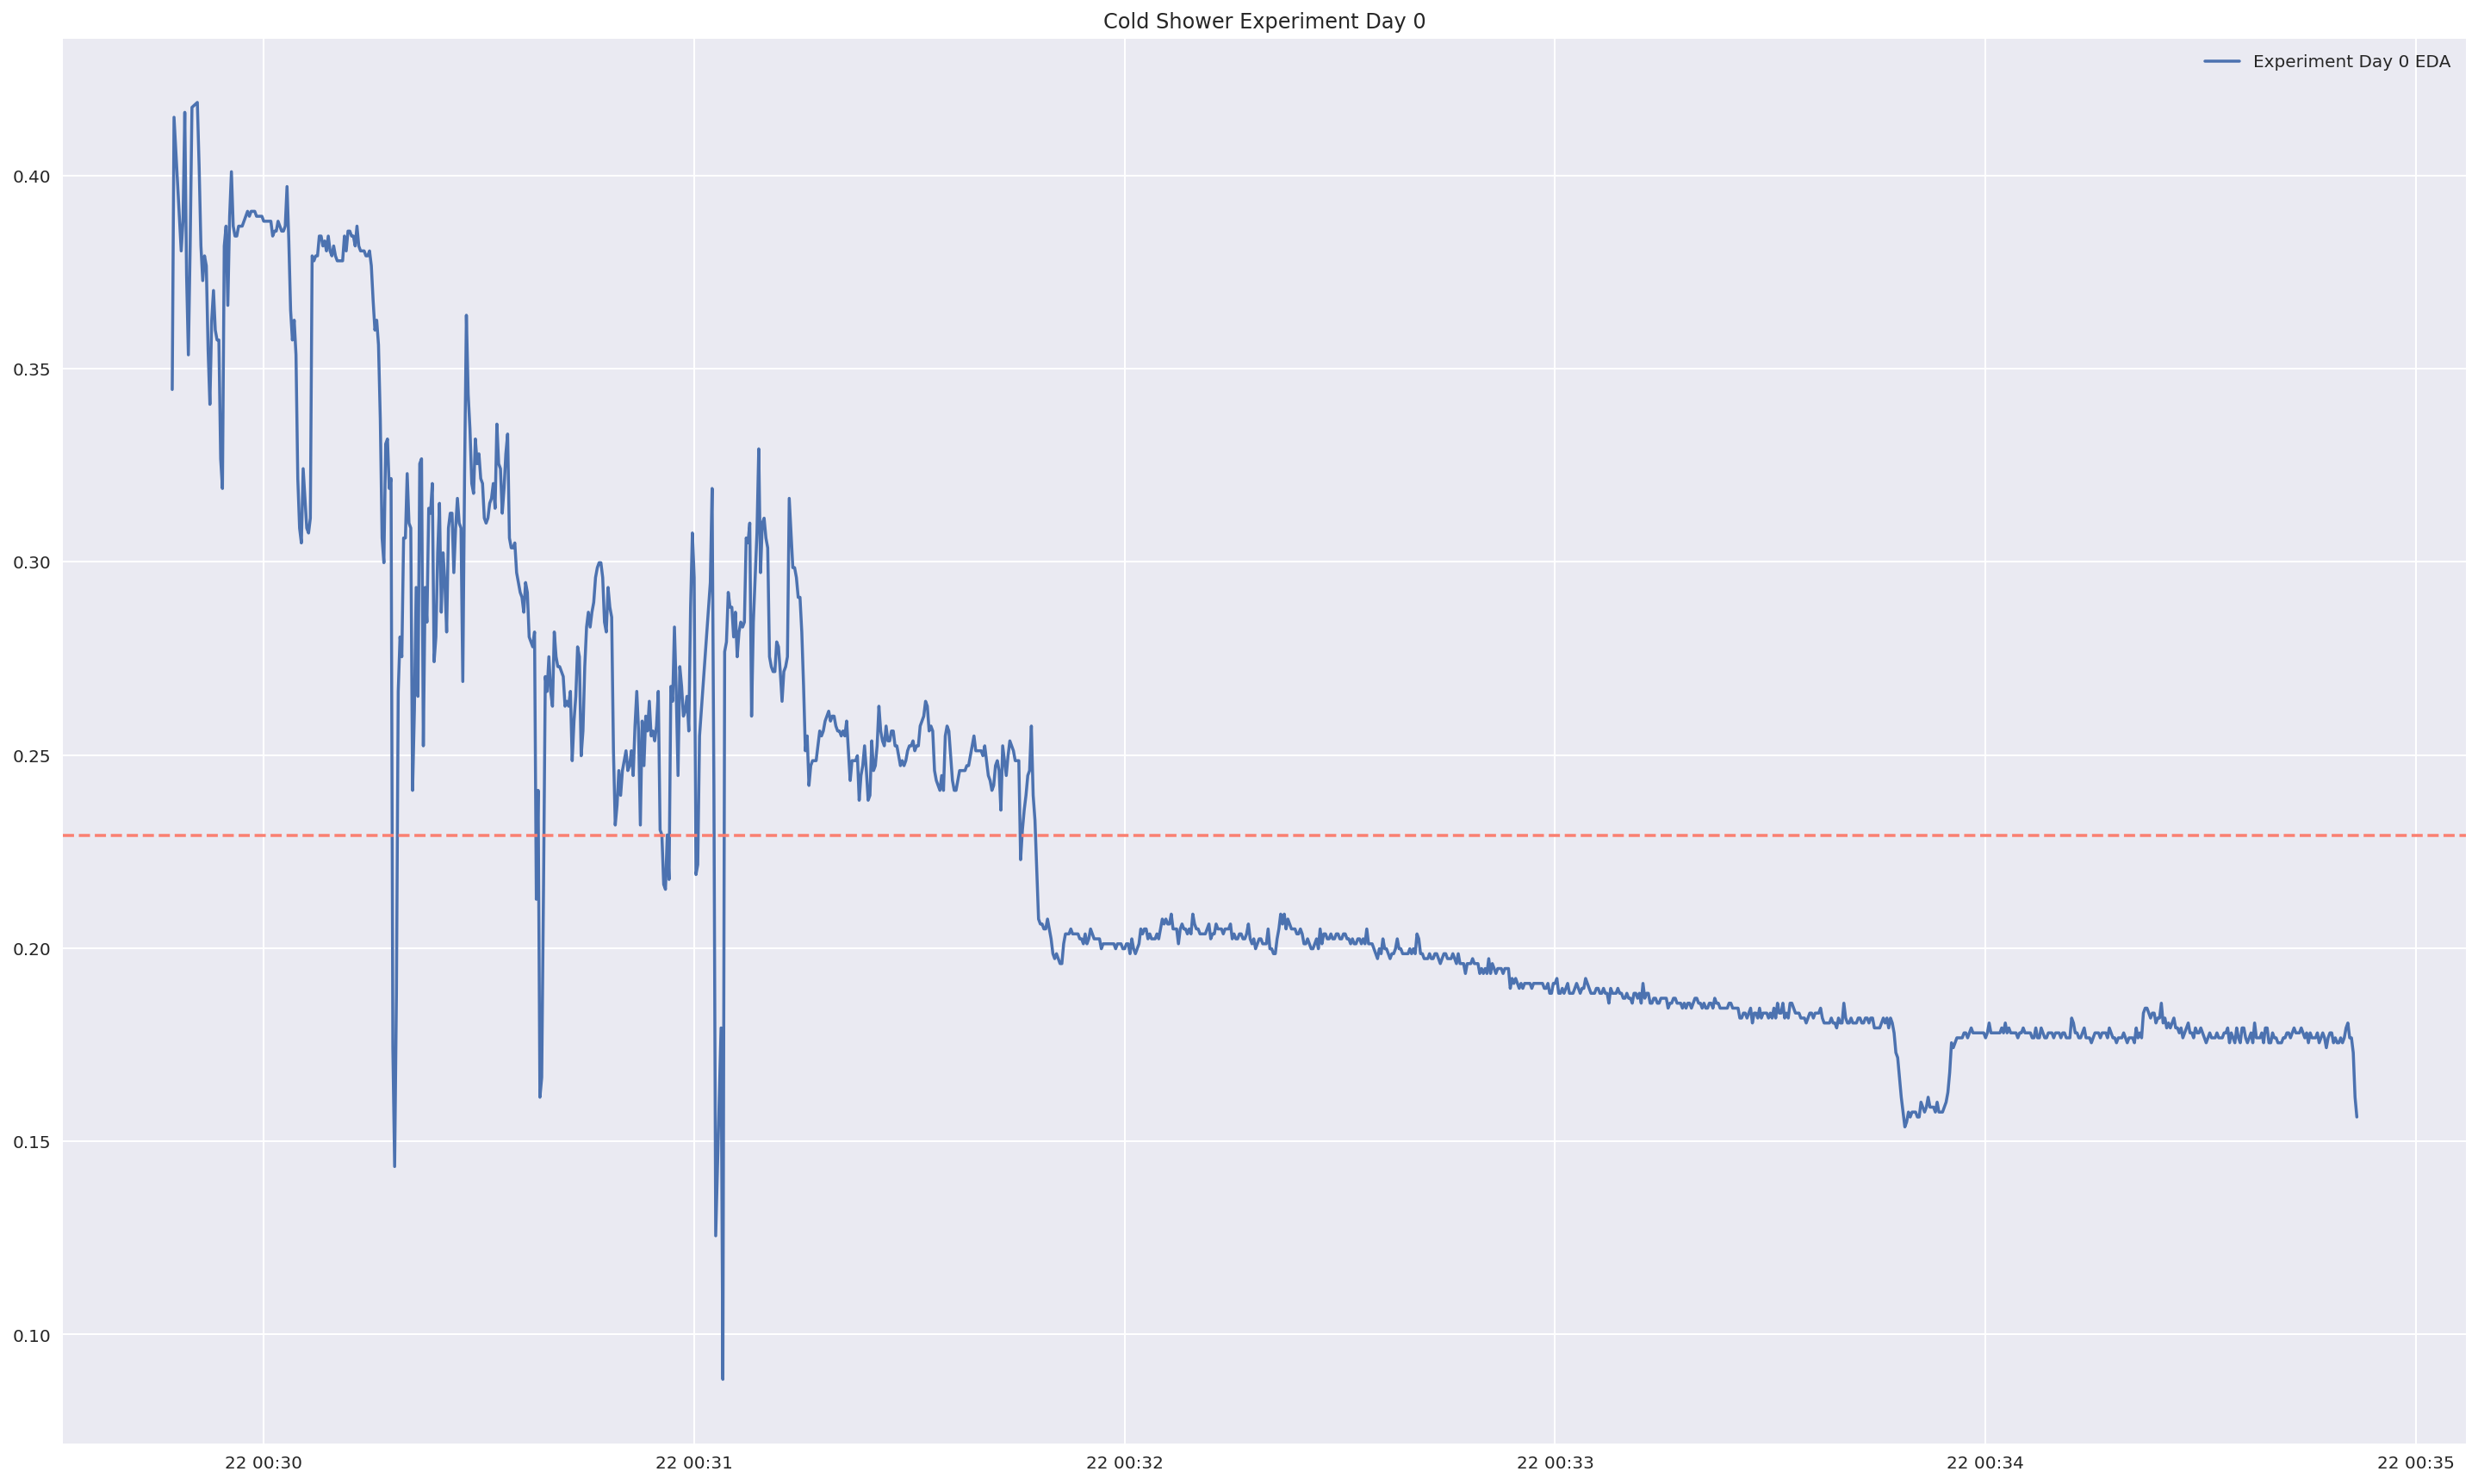

In [130]:
y_mean = np.mean(fl_exp0.eda)
plt.figure(figsize=(25,15))
plt.plot(fl_exp0)
plt.legend(['Experiment Day 0 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
plt.title('Cold Shower Experiment Day 0')
plt.show()

### Day 1


## EDA Analysis

## CR 

 **r**: phasic component
     
 
 **p**: sparse SMNA driver of phasic component
     
     
 **t**: tonic component
     
     
 **l**: coefficients of tonic spline
     
     
 **d**: offset and slope of the linear drift term
 
 
 **e**: model residuals
 
 
 **obj**: value of objective function being minimized (eq 15 of paper)

In [131]:
y = np.asarray(fl_exp0.eda)
y[:10]

array([0.344616, 0.415076, 0.380487, 0.388173, 0.416357, 0.374081,
       0.353584, 0.381768, 0.417639, 0.41892 ])

In [147]:
yn = (y - y.mean()) / y.std()
Fs = 4.
[r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm = pl.arange(1., len(y)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -5.7208e+02 -5.6110e+02  2e+03  5e+01  5e-01
 1: -5.7689e+02 -8.4300e+02  3e+02  7e+00  7e-02
 2: -5.8525e+02 -7.1619e+02  1e+02  2e+00  2e-02
 3: -5.8805e+02 -6.6003e+02  7e+01  1e+00  1e-02
 4: -5.9030e+02 -6.3986e+02  5e+01  6e-01  6e-03
 5: -5.9210e+02 -6.1430e+02  2e+01  2e-01  2e-03
 6: -5.9275e+02 -6.0697e+02  1e+01  1e-01  1e-03
 7: -5.9345e+02 -5.9805e+02  5e+00  2e-02  2e-04
 8: -5.9464e+02 -5.9595e+02  1e+00  5e-03  5e-05
 9: -5.9499e+02 -5.9562e+02  6e-01  2e-03  2e-05
10: -5.9529e+02 -5.9545e+02  2e-01  3e-04  3e-06
11: -5.9536e+02 -5.9540e+02  5e-02  4e-05  5e-07
12: -5.9538e+02 -5.9539e+02  1e-02  9e-06  9e-08
13: -5.9538e+02 -5.9538e+02  3e-03  1e-06  1e-08
14: -5.9538e+02 -5.9538e+02  5e-04  1e-07  1e-09
15: -5.9538e+02 -5.9538e+02  7e-05  9e-09  9e-11
16: -5.9538e+02 -5.9538e+02  5e-06  6e-10  7e-12
17: -5.9538e+02 -5.9538e+02  1e-07  2e-11  2e-13
Optimal solution found.


In [153]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pl.rcParams.update(params)

In [154]:
print(obj)

[8.11691816]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


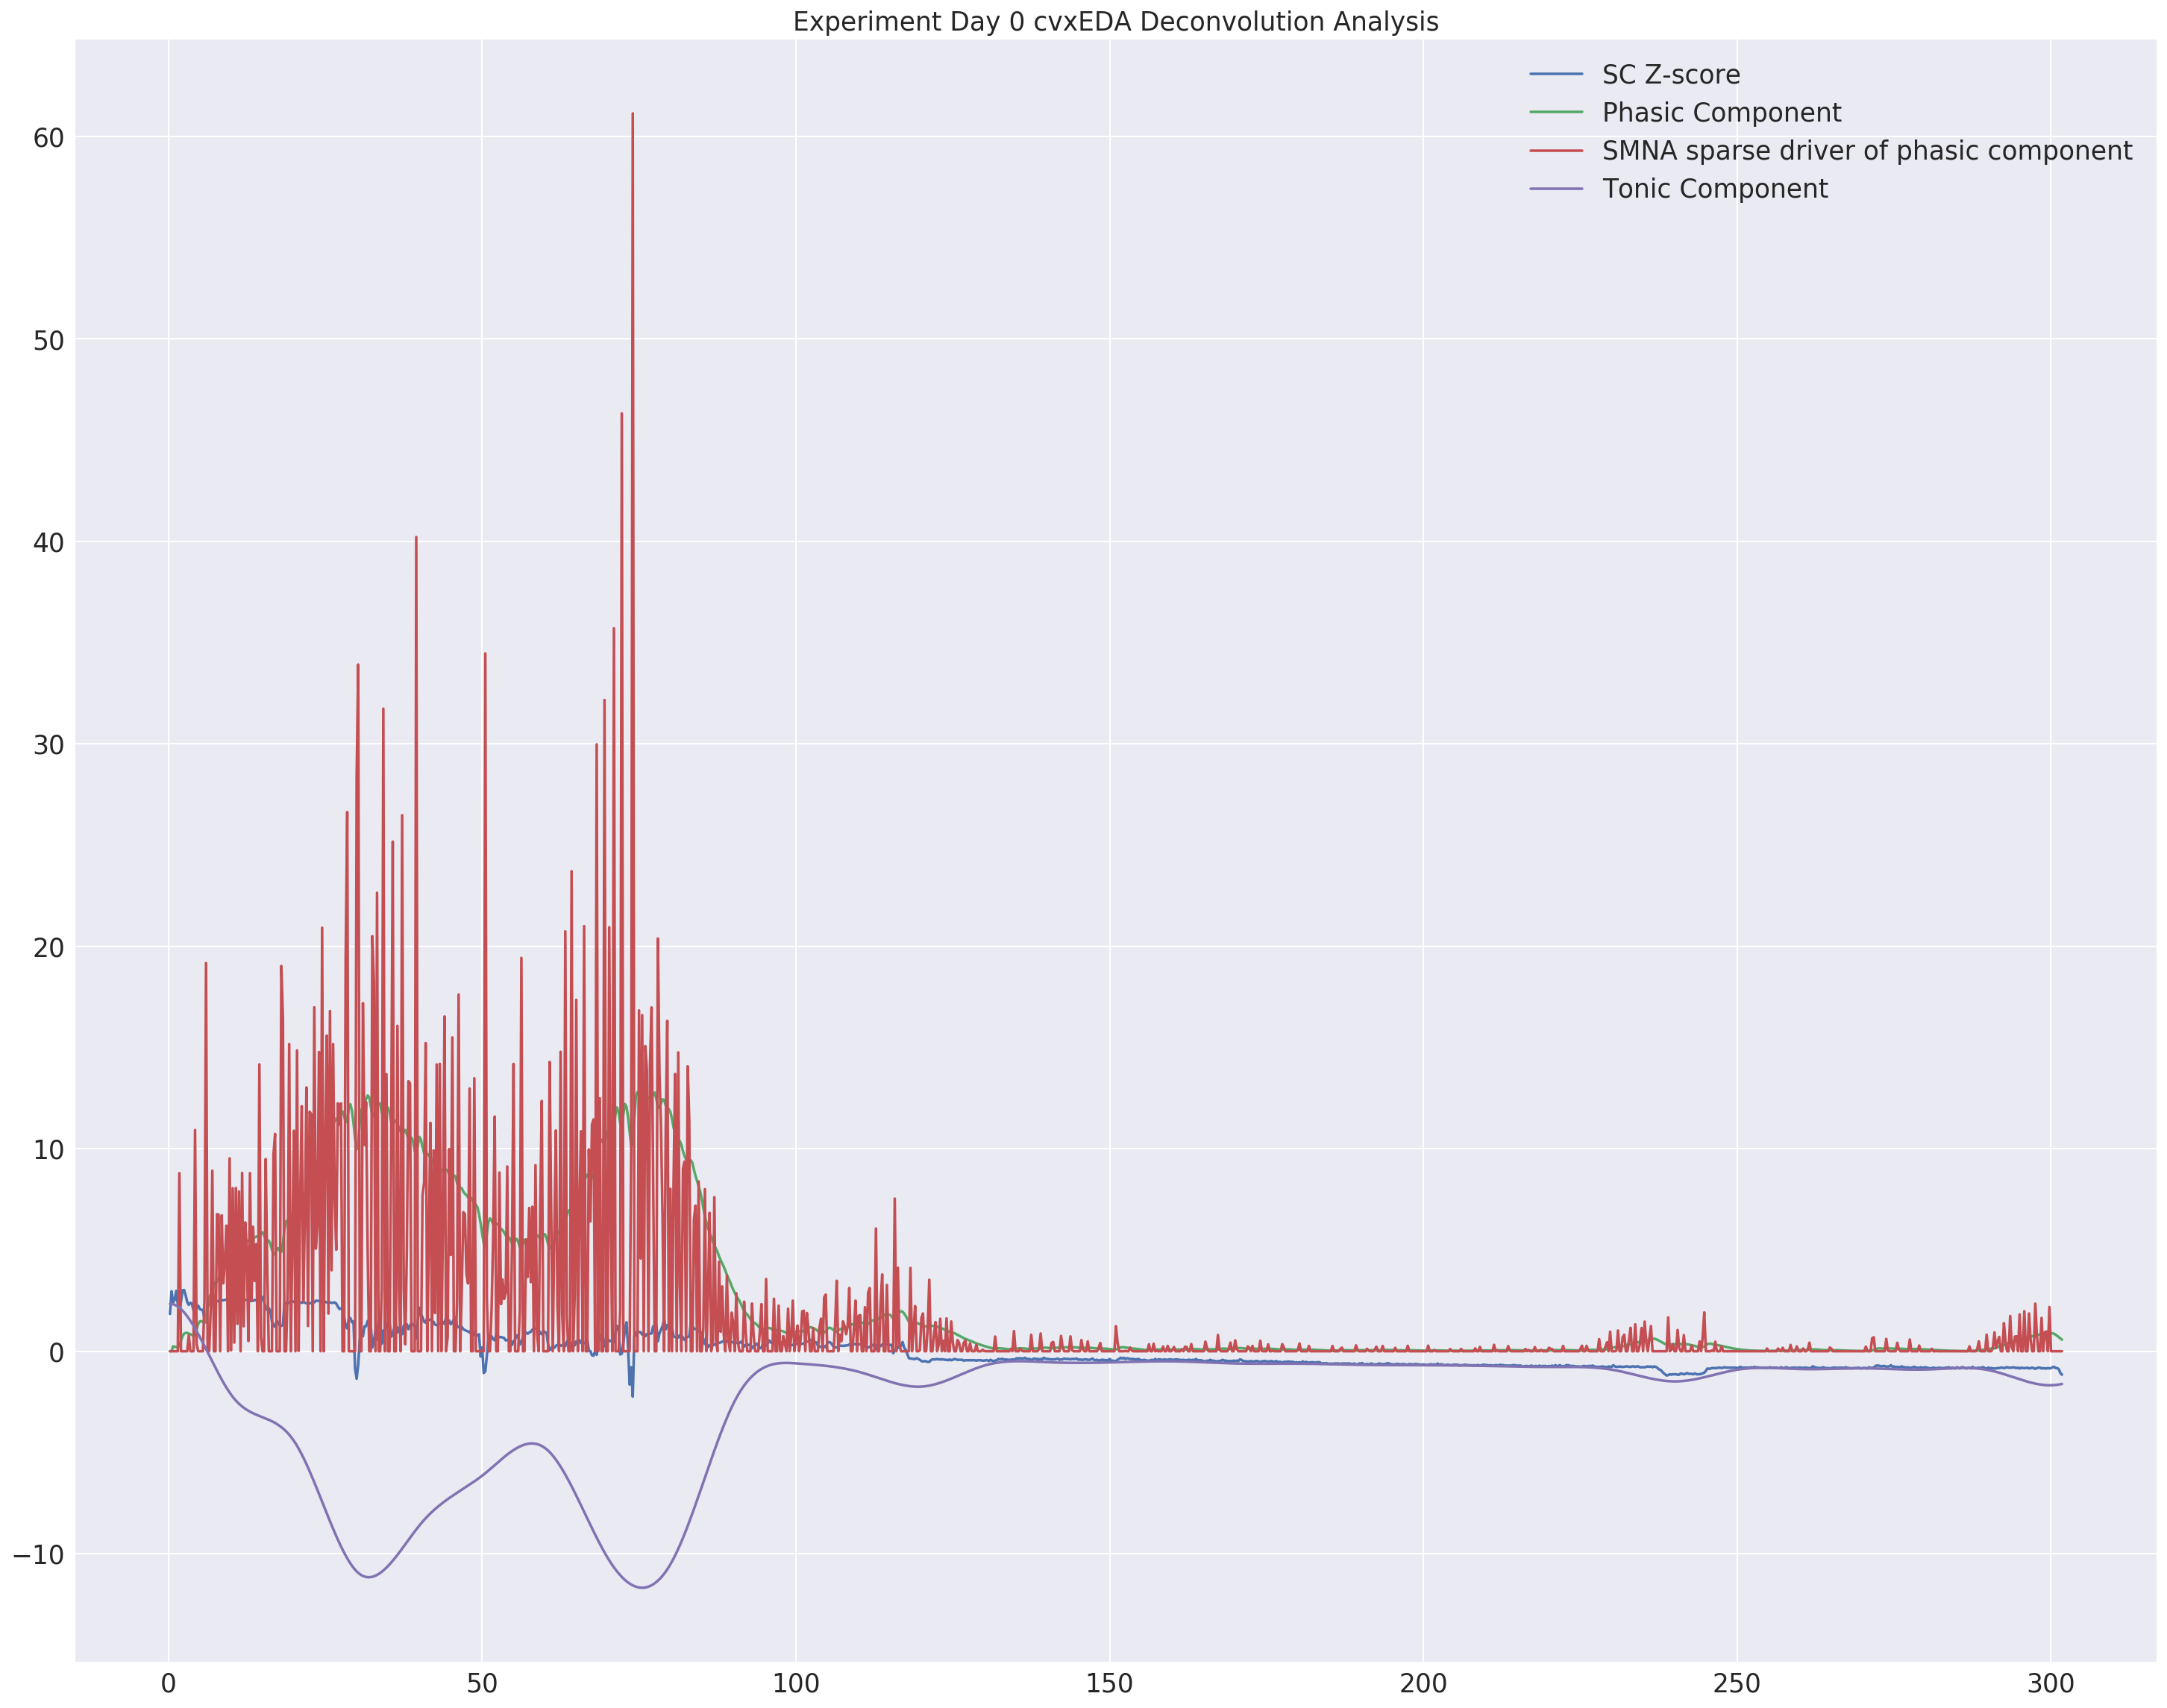

In [163]:
pl.hold(True)
pl.plot(tm, yn)
pl.plot(tm, r)
pl.plot(tm, p)
pl.plot(tm, t)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


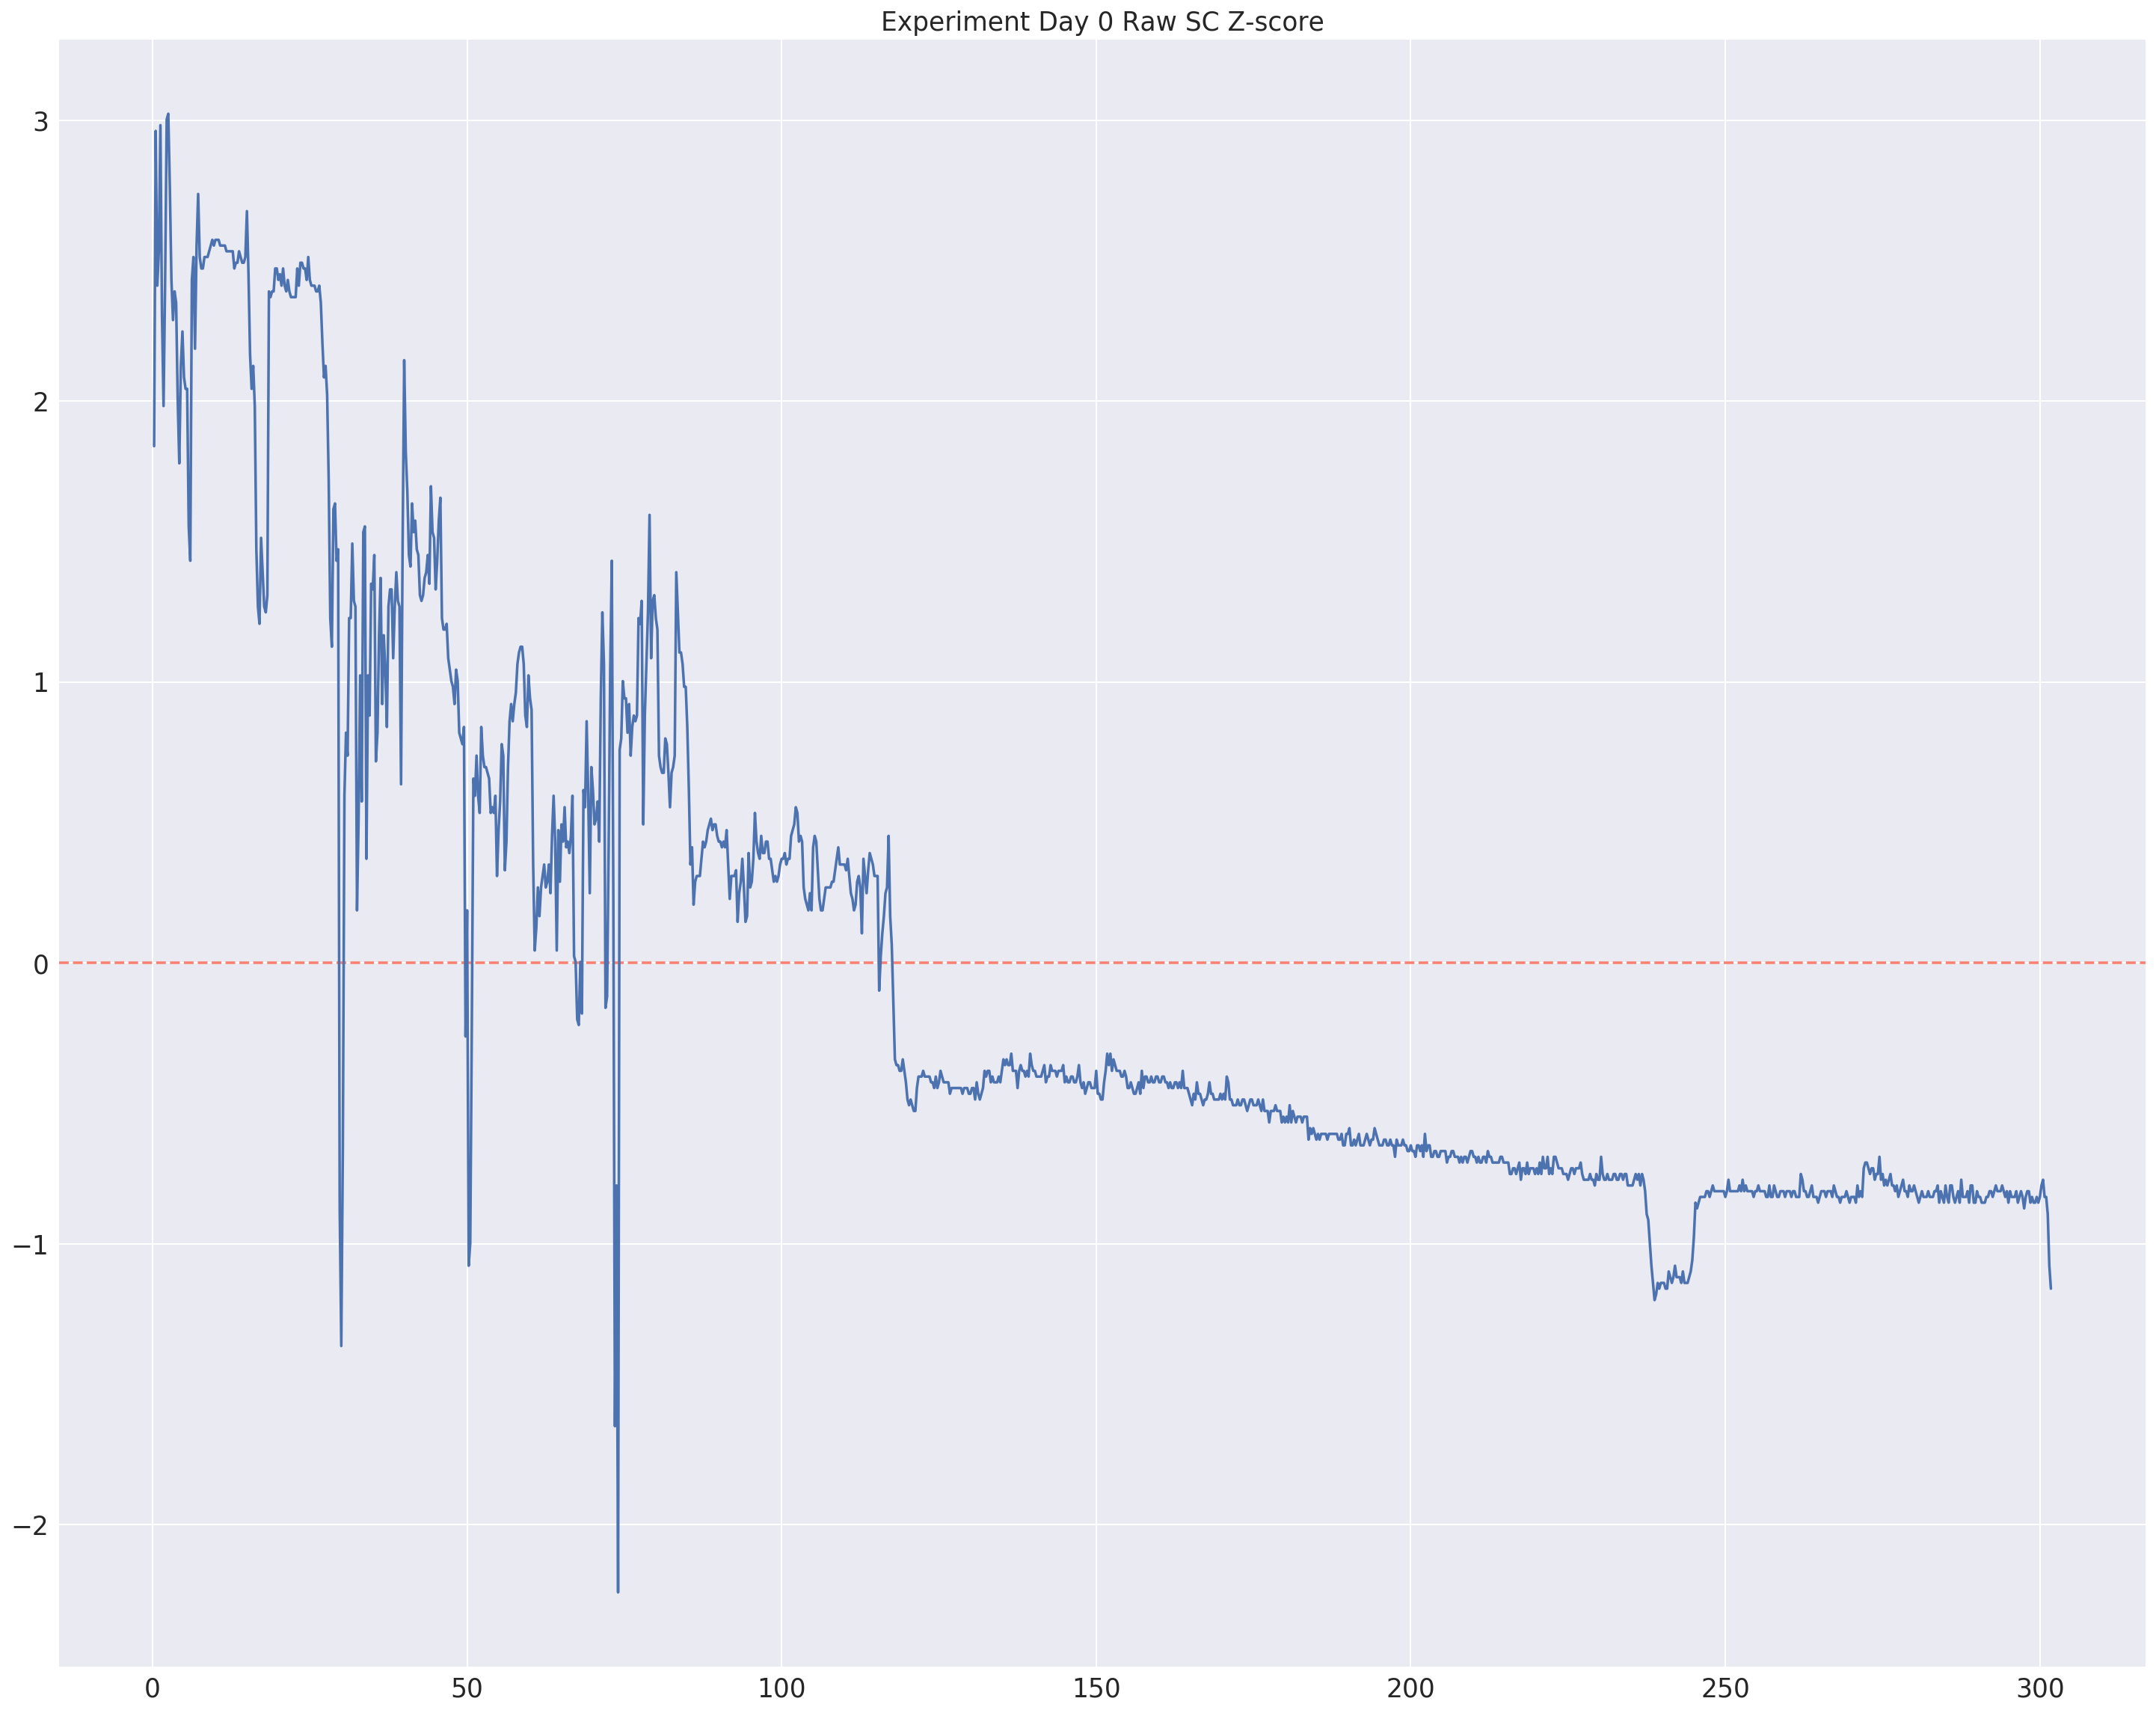

In [162]:
pl.hold(True)
y_mean = np.mean(yn)
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 Raw SC Z-score')
# pl.legend(['SC series','Phasic Component','SMNA sparse driver of phasic component',
#            'Tonic Component'])

pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


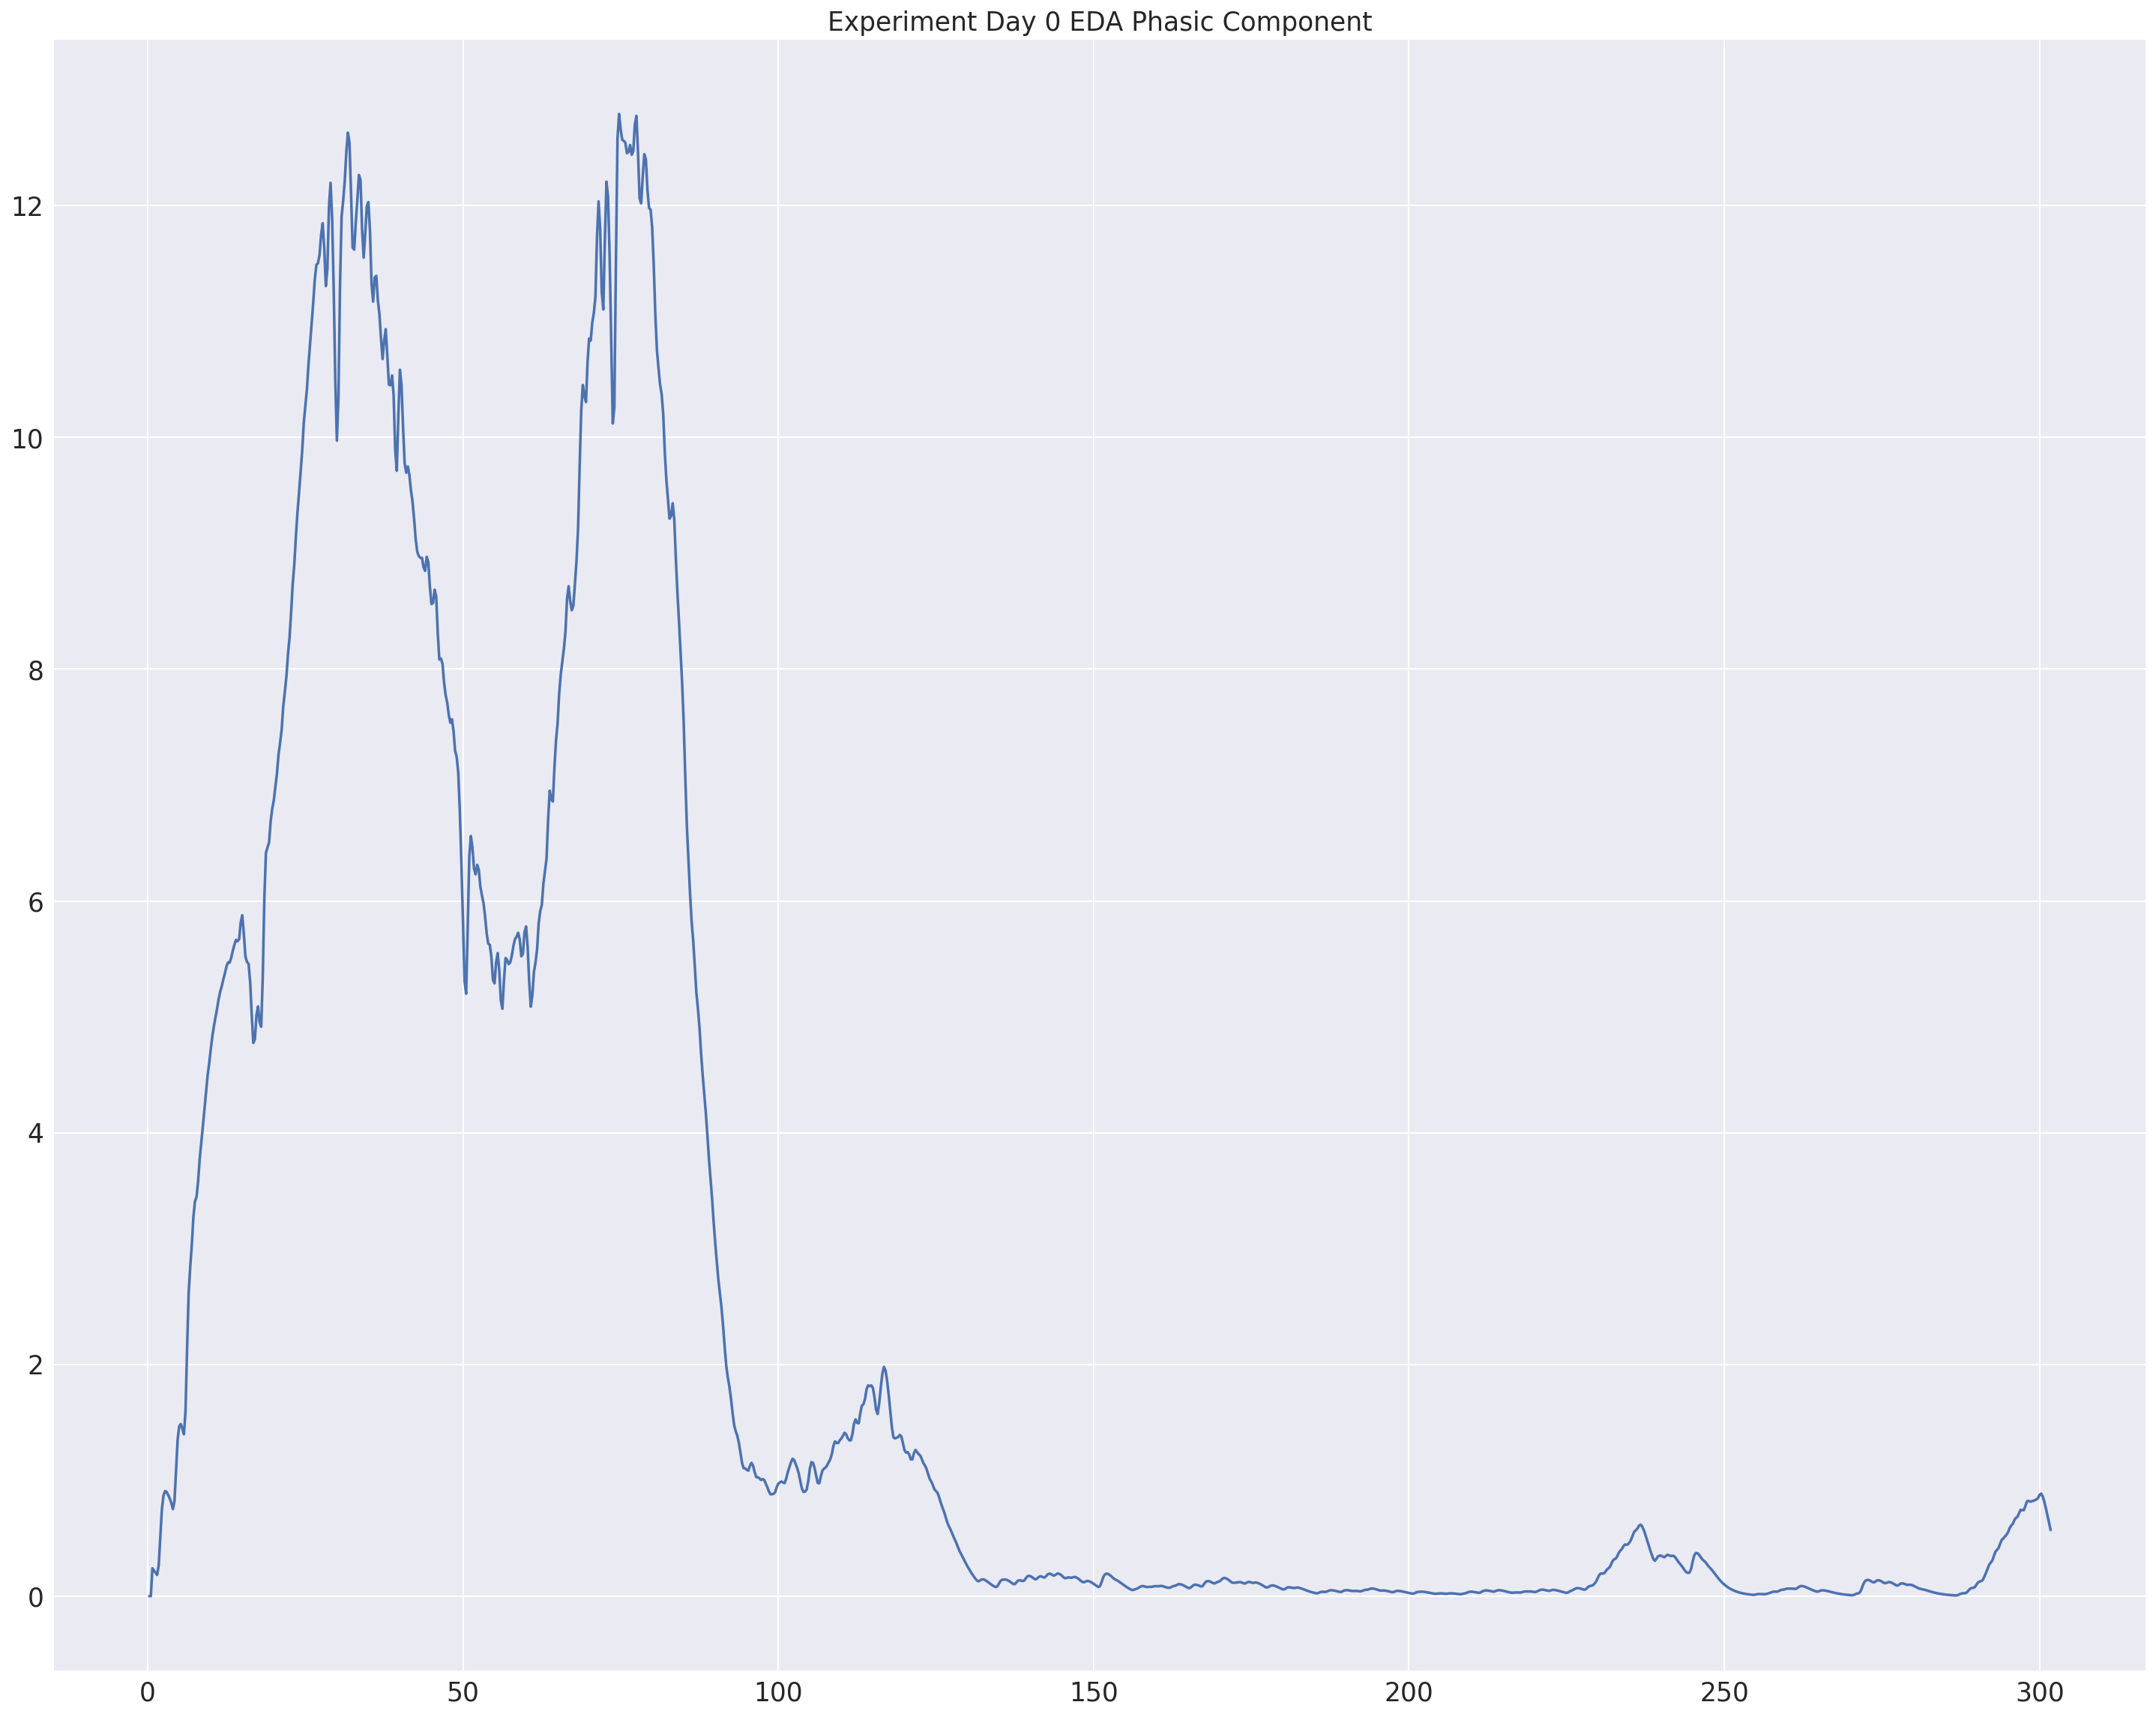

In [156]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


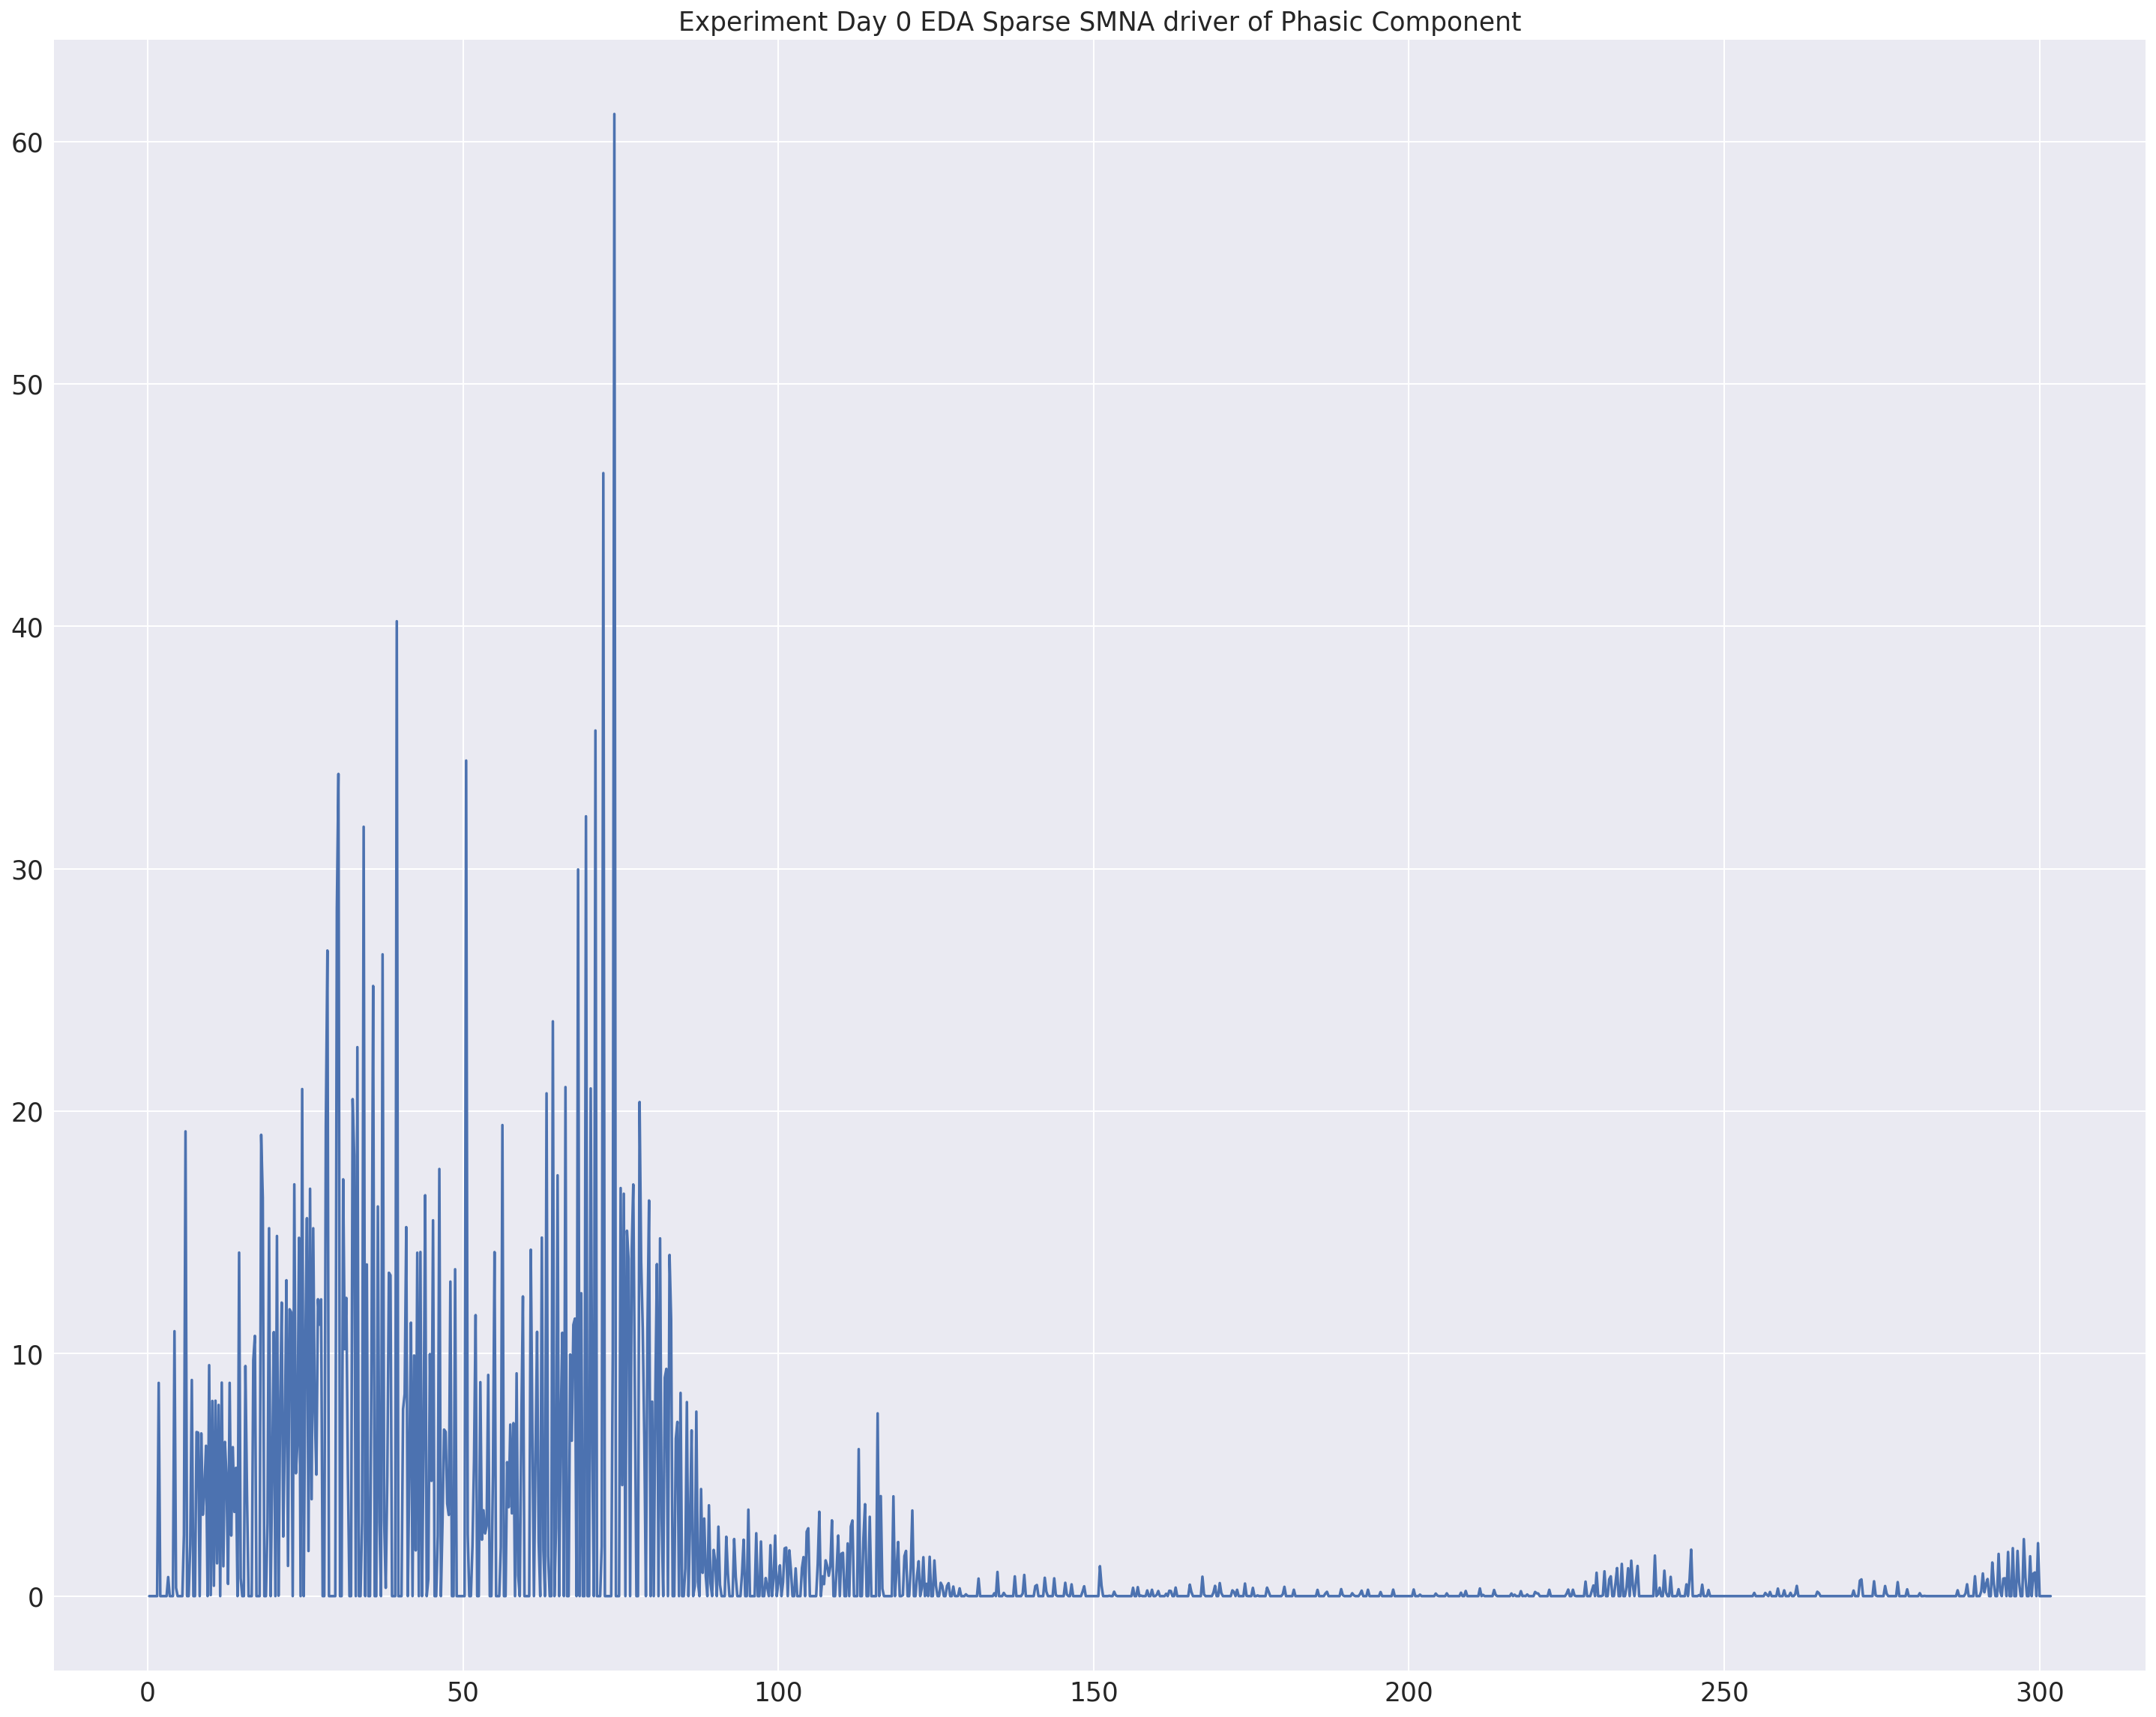

In [157]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Sparse SMNA driver of Phasic Component')
pl.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


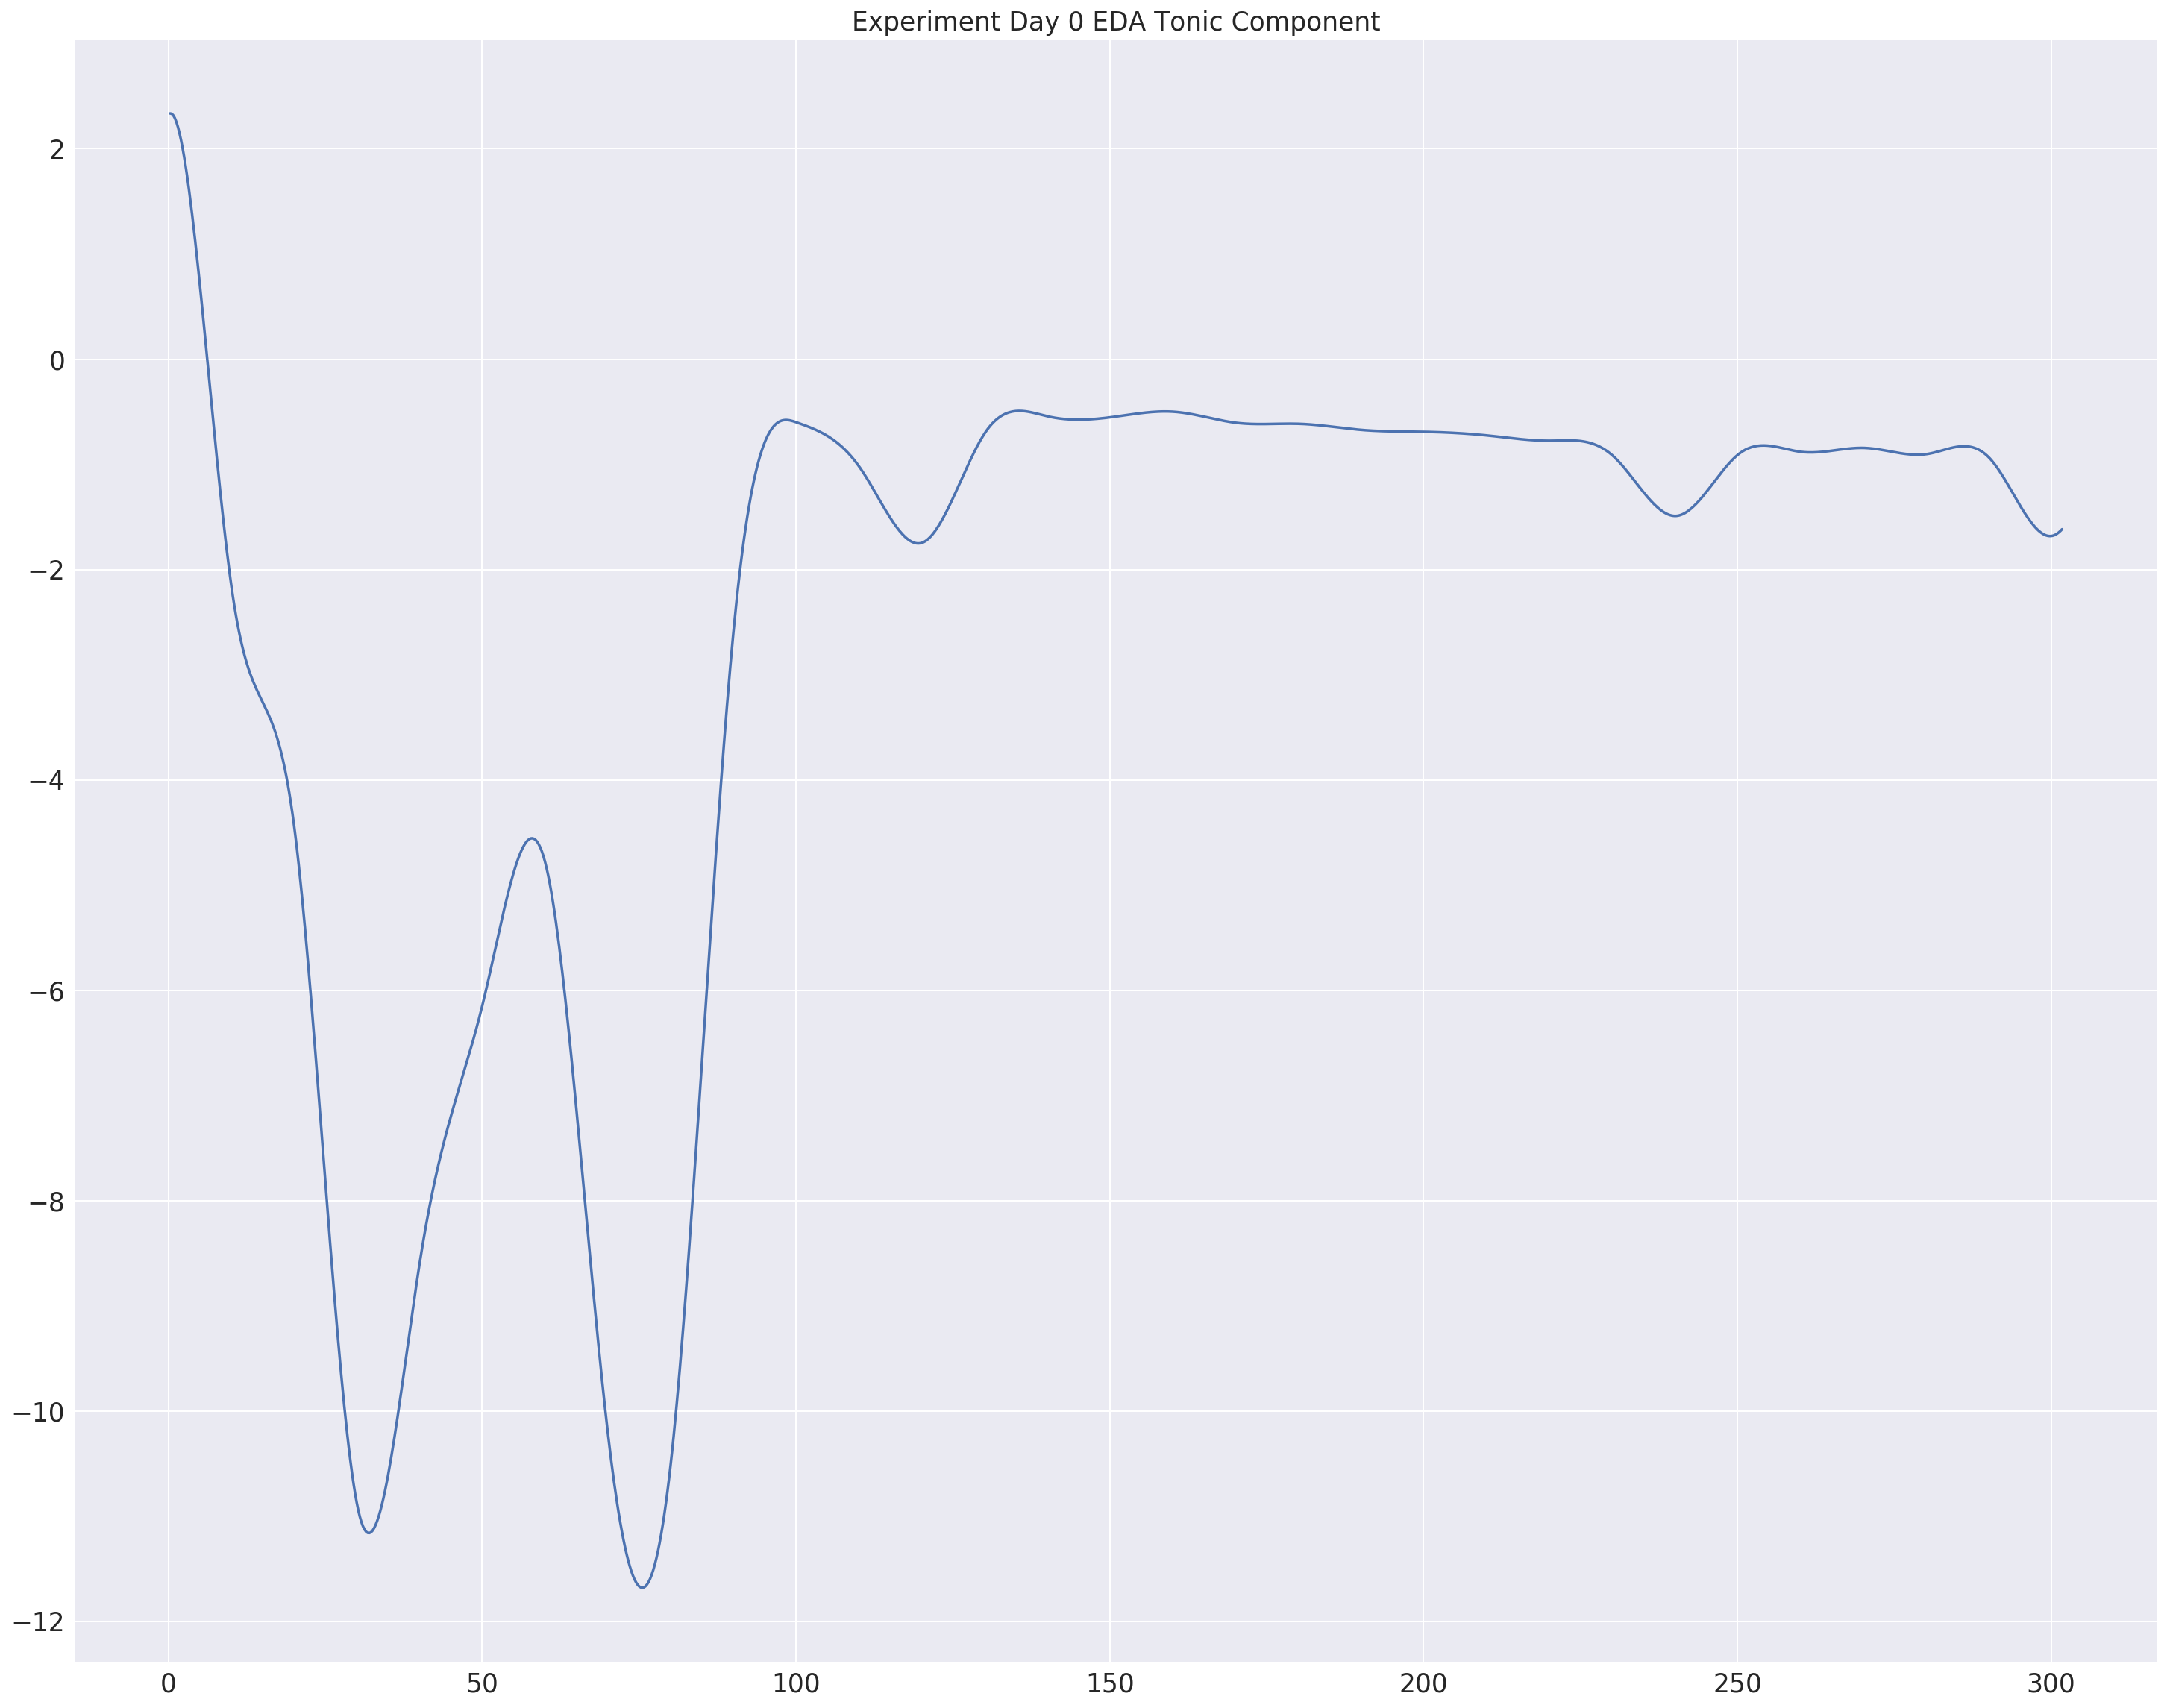

In [158]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Tonic Component')
pl.show()